<a href="https://colab.research.google.com/github/spesivan/colab-notes-v2/blob/main/yolov5_pytorch_obj_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf sample_data

In [ ]:
!rm -rf Cubes-1

In [ ]:
# https://universe.roboflow.com/mayank-tripathi-h4ov1/cubes-hmstd

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bYbWrPpLt1yNAM2mBTmX")
project = rf.workspace("mayank-tripathi-h4ov1").project("cubes-hmstd")
version = project.version(1)
dataset = version.download("yolov5")


In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16625, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 16625 (delta 58), reused 66 (delta 30), pack-reused 16522
Receiving objects: 100% (16625/16625), 15.15 MiB | 33.29 MiB/s, done.
Resolving deltas: 100% (11411/11411), done.
/content/yolov5


In [3]:
!python train.py --img 640 --batch 16 --epochs 50 --data cubes.yaml --weights yolov5s.pt --cache

2024-05-26 15:42:14.007992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 15:42:14.008044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 15:42:14.010013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=cubes.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optim

In [6]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/Cubes/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/Cubes/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/26 /content/Cubes/test/images/CN1-1-008_00043_JPG.rf.0f6de859e536aee9766ca0f3726e8bd2.jpg: 640x640 1 concrete_cube, 6.3ms
image 2/26 /content/Cubes/test/images/CN1-4-008_00046_JPG.rf.c4971271eeee22e1bf6f984ab24b524f.jpg: 640x640 1 concrete_cube, 7.0ms
image 

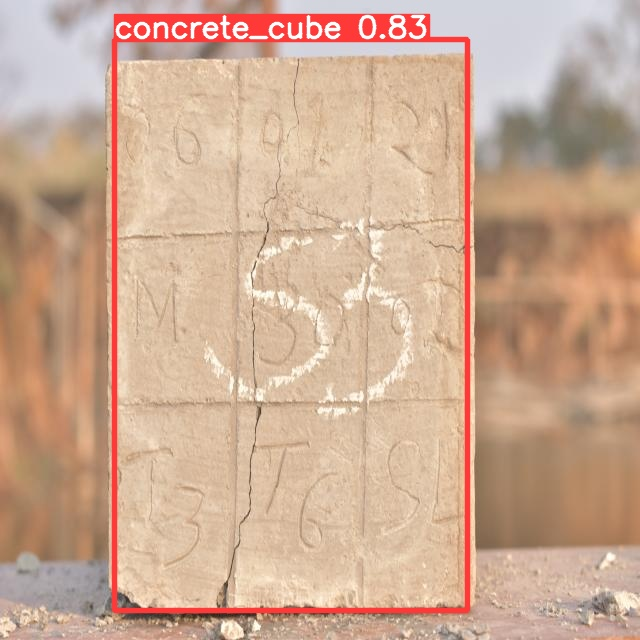

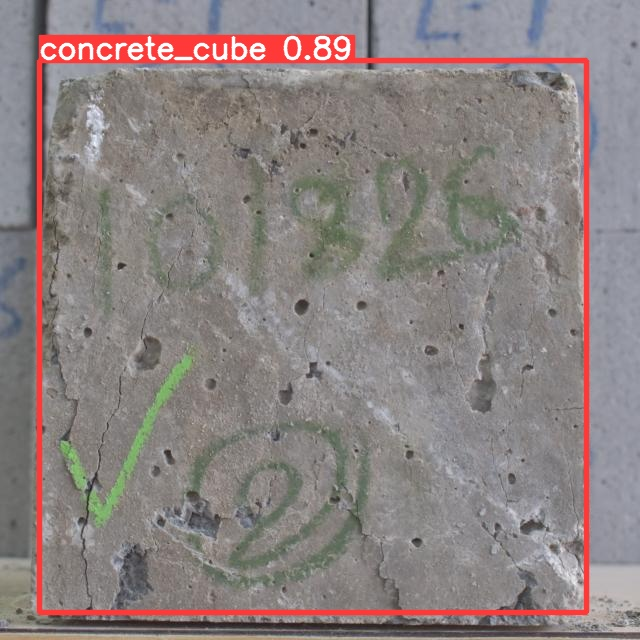

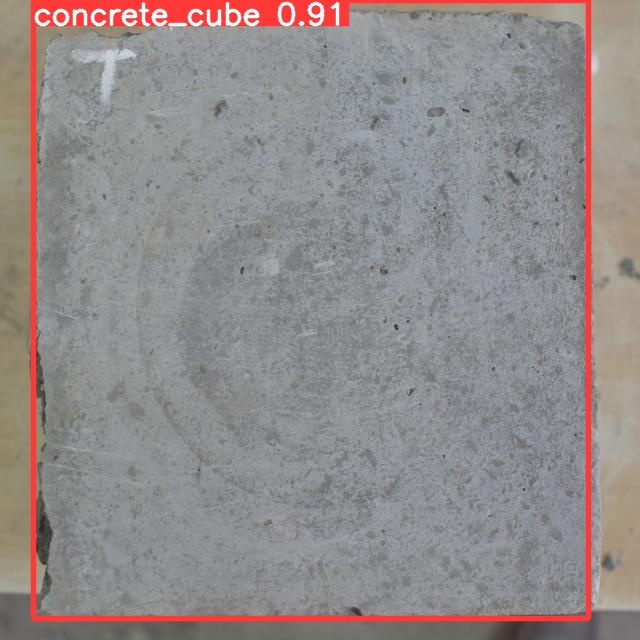

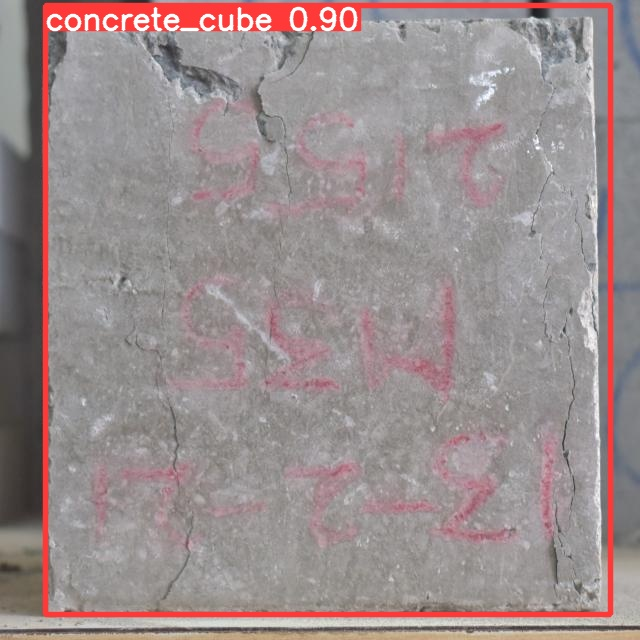

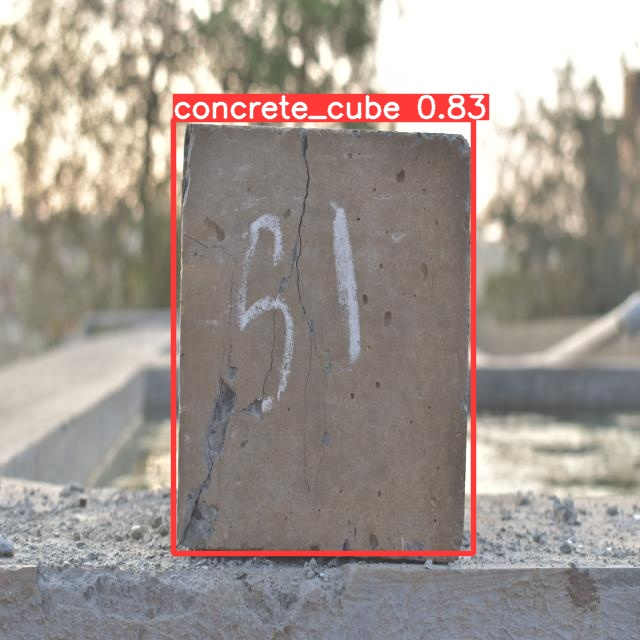

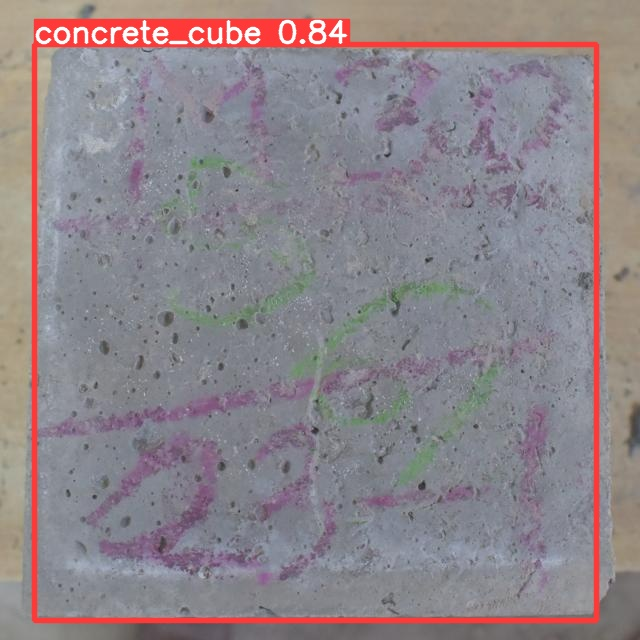

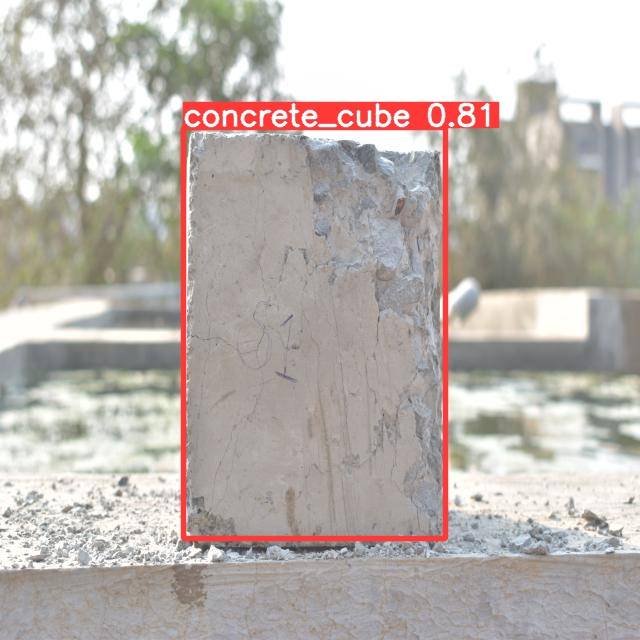

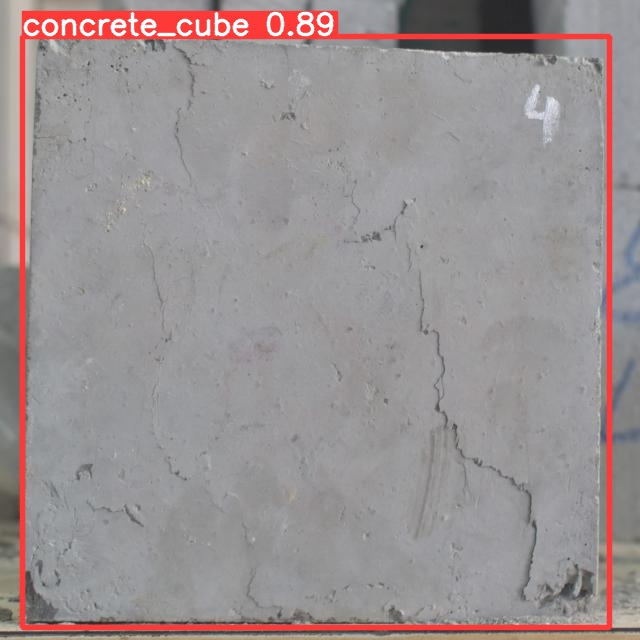

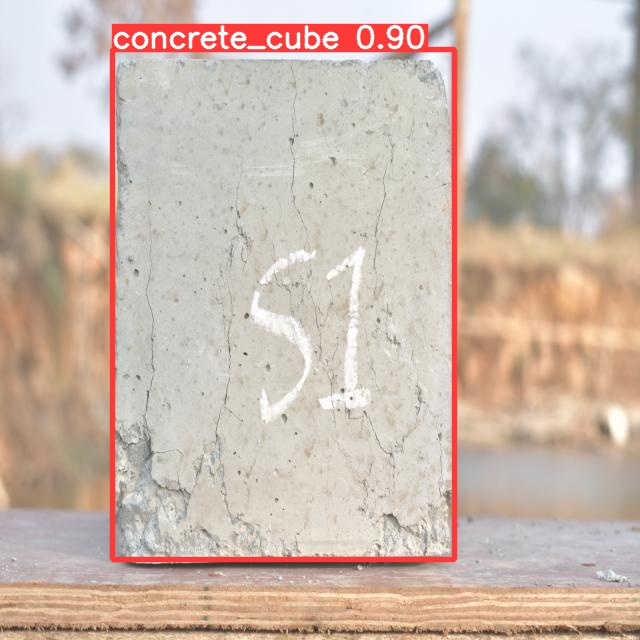

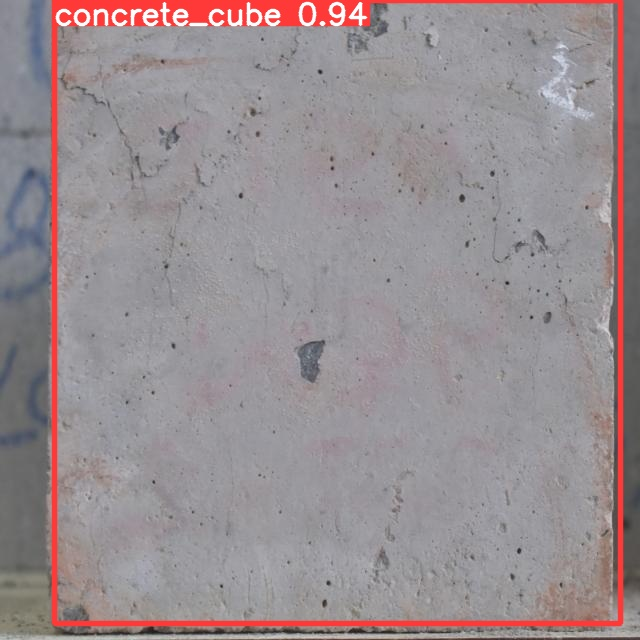

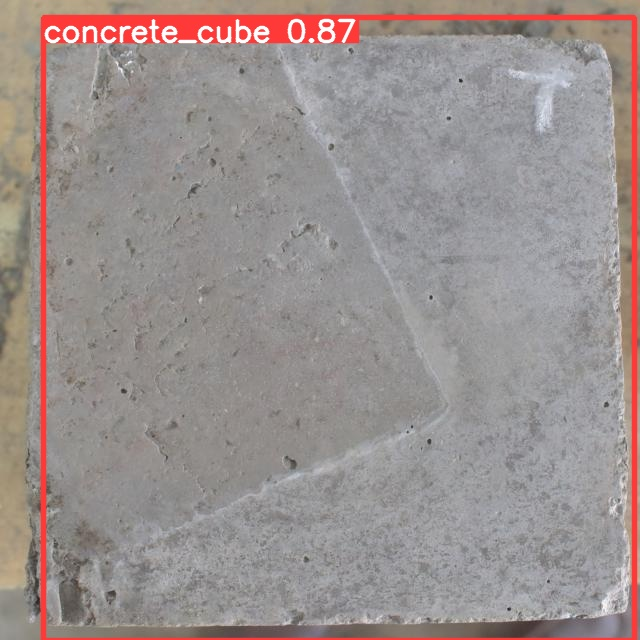

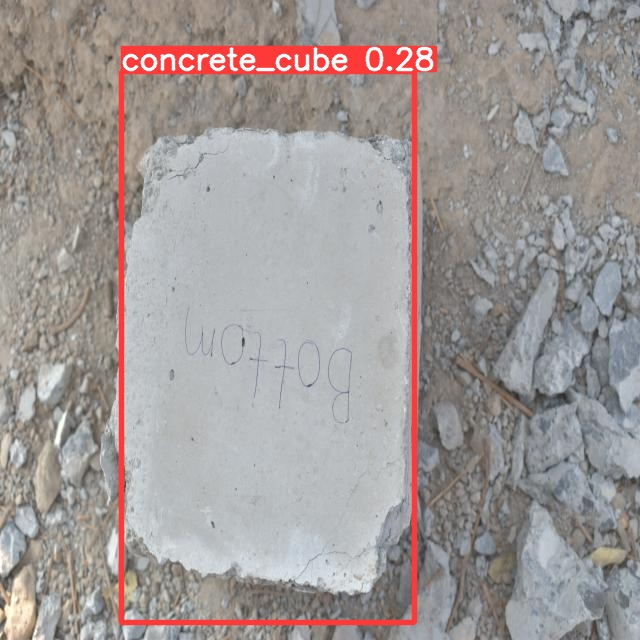

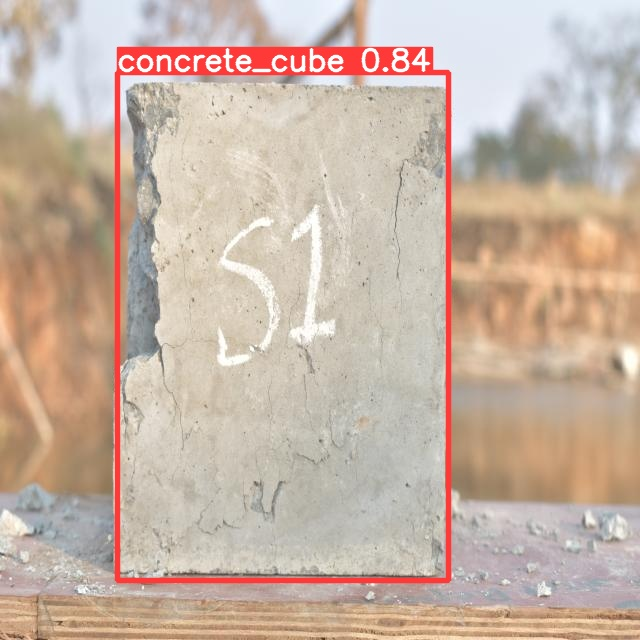

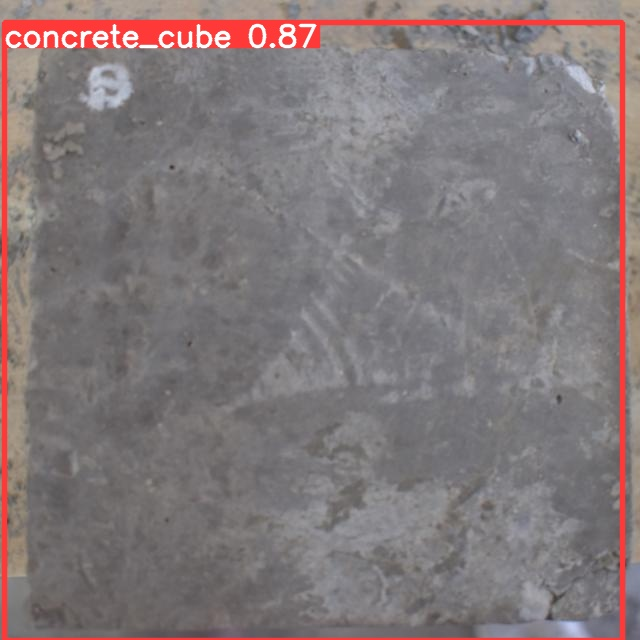

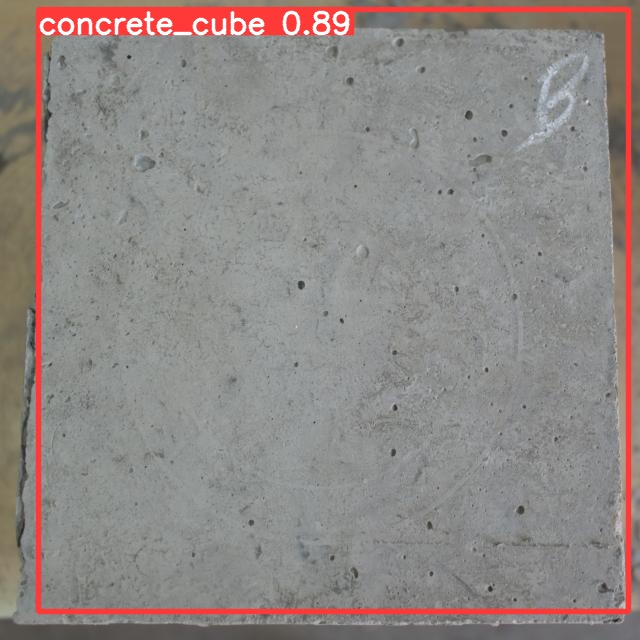

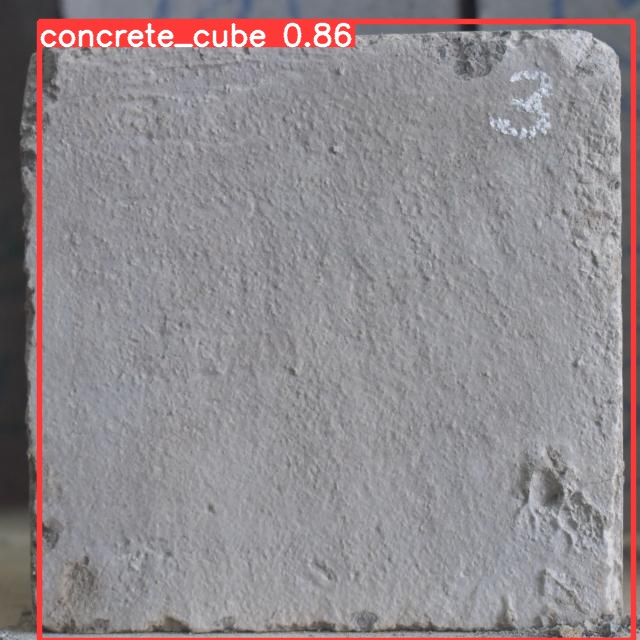

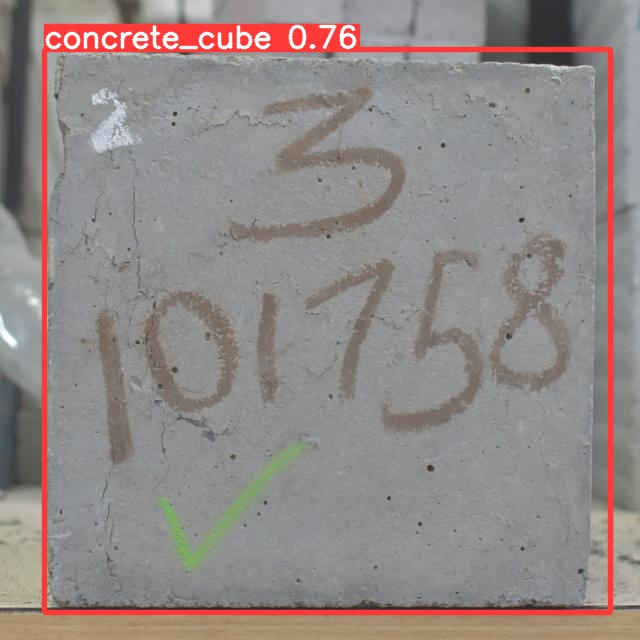

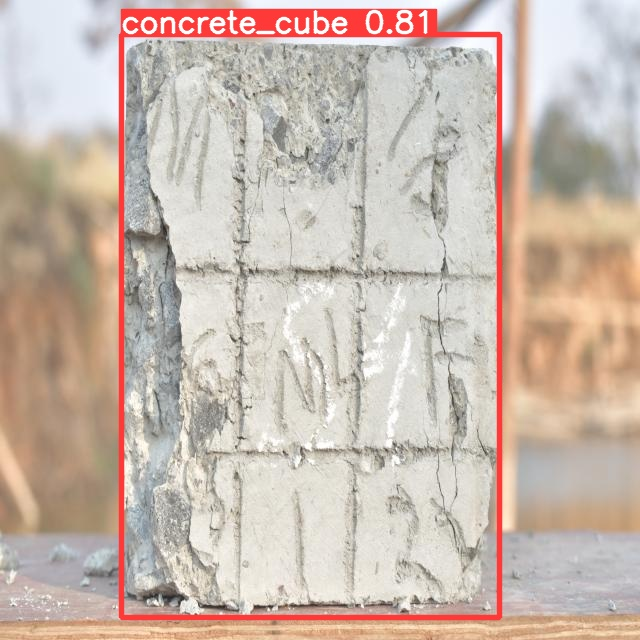

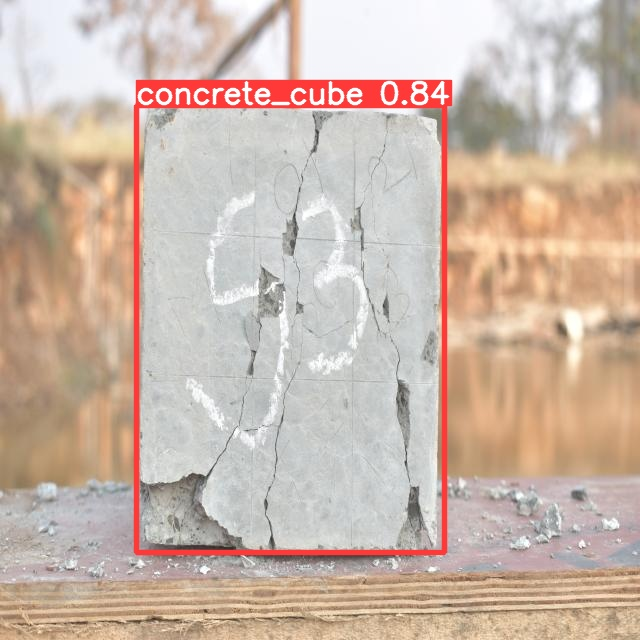

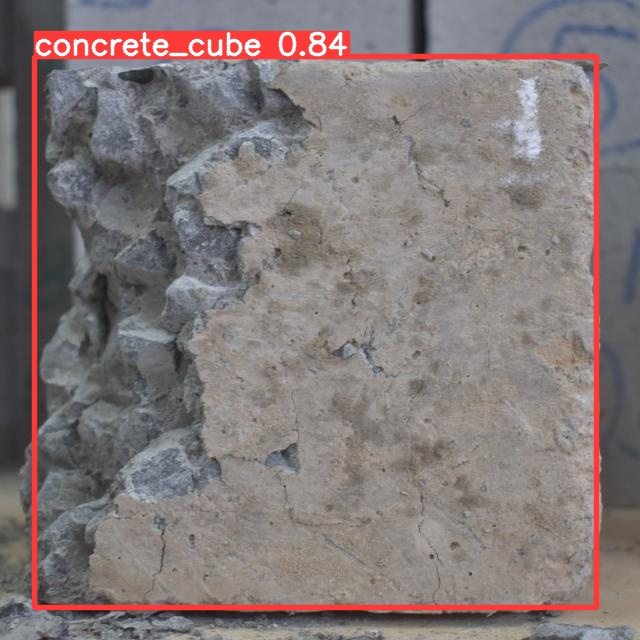

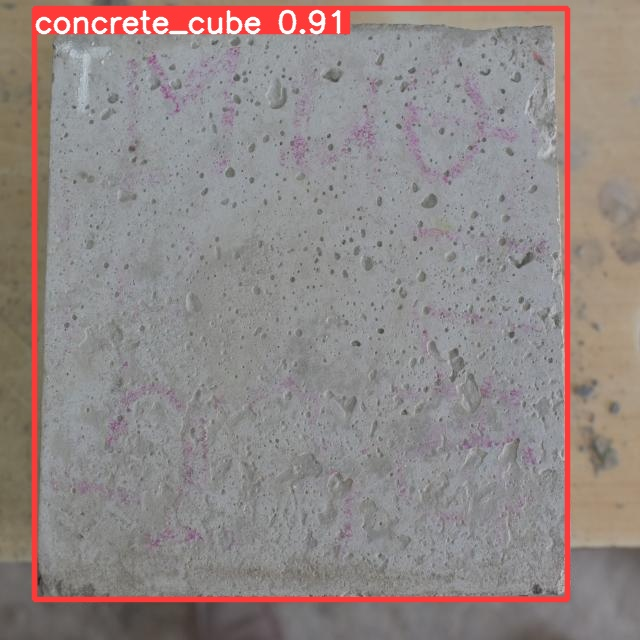

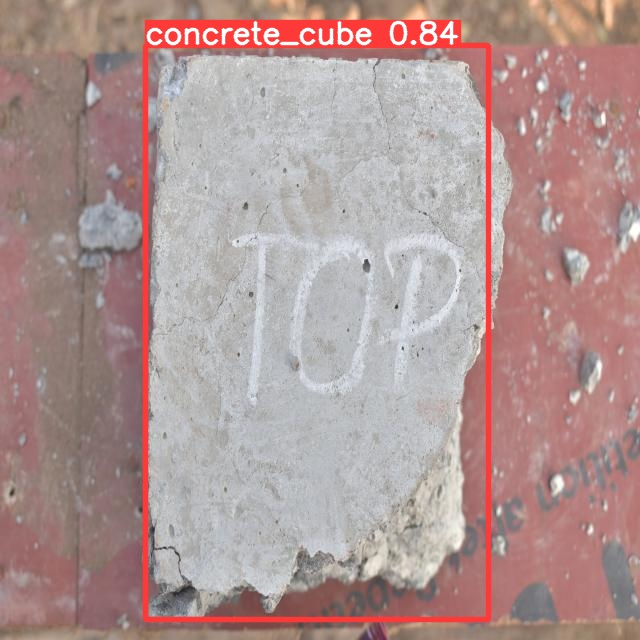

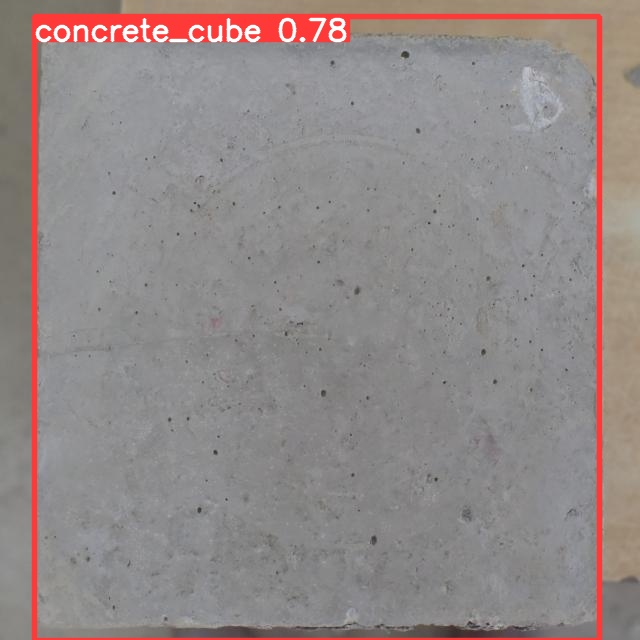

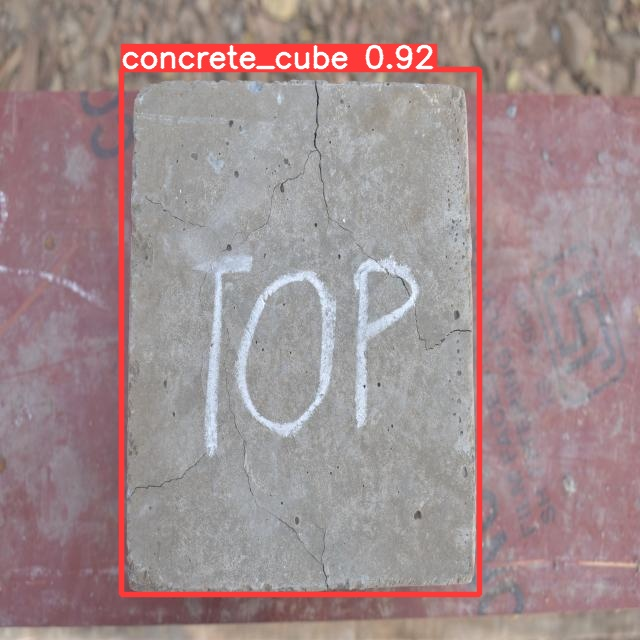

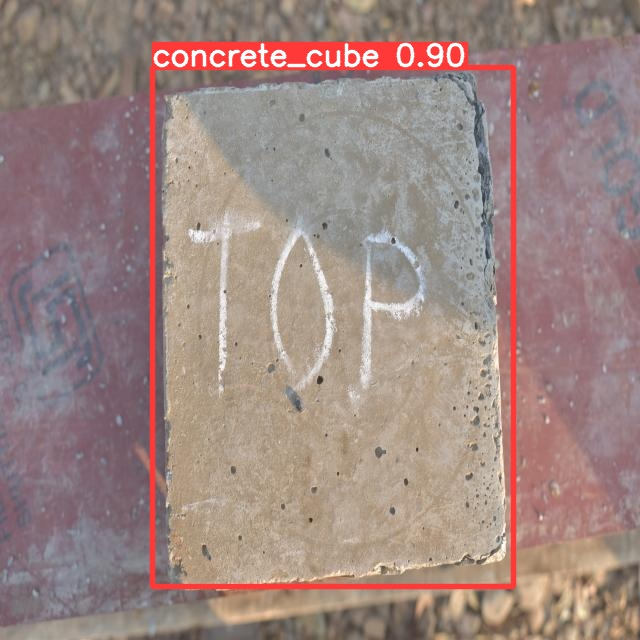

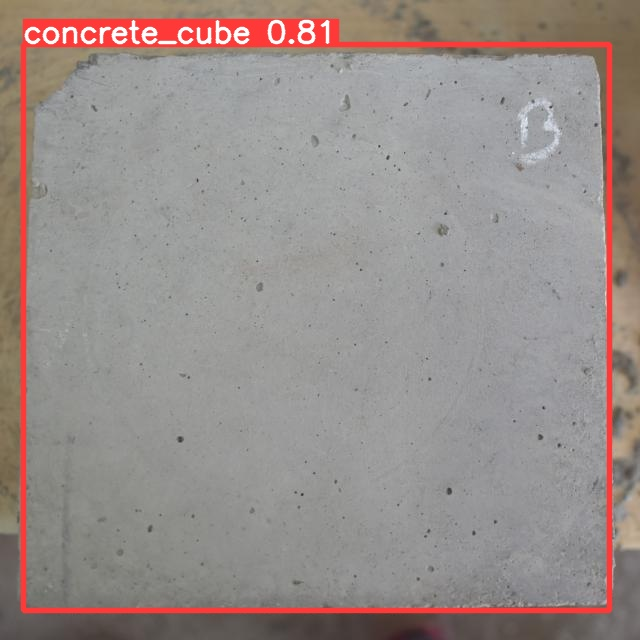

In [9]:
import os
from IPython.display import Image, display

folder_path = '/content/yolov5/runs/detect/exp2'

images = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

for img_path in images:
    display(Image(filename=img_path))